In [2]:
import matplotlib.backends
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

weight_by_length = False

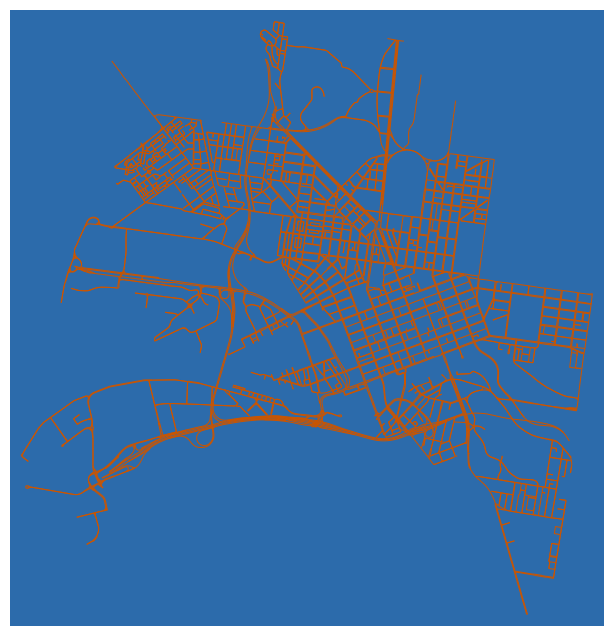

In [36]:
place_name = "City of Melbourne, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="#CC5500", edge_linewidth=0.75, bgcolor = '#2c6bab', filepath="/Users/Jackson/mothersDay2025/output/melb_drive.png", save=True, show=False)

#plt.savefig('/Users/Jackson/mothersDay2025/output/melb_drive.png', bbox_inches='tight')
#plt.show()

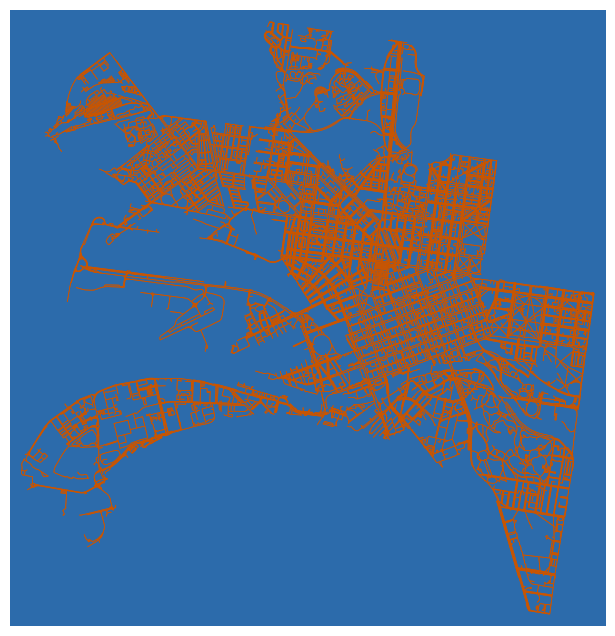

In [35]:
place_name = "City of Melbourne, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="walk")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="#CC5500", edge_linewidth=0.55, bgcolor = '#2c6bab', filepath="/Users/Jackson/mothersDay2025/output/melb_walk.png", save=True, show=False)

#plt.savefig('/Users/Jackson/mothersDay2025/output/melb_drive.png', bbox_inches='tight')
#plt.show()

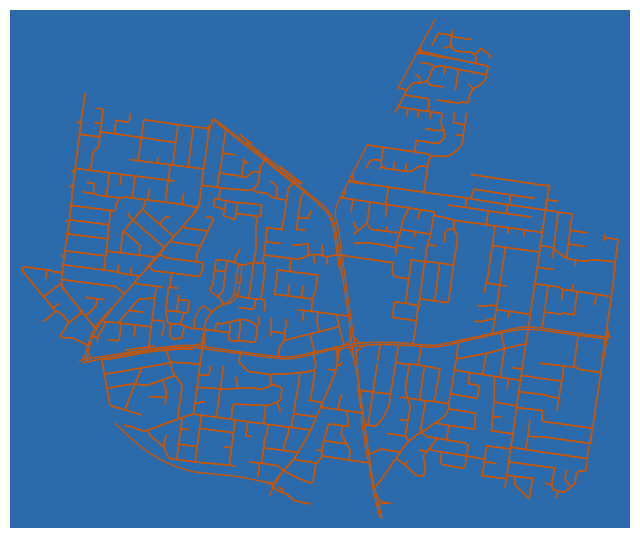

In [34]:
place_name = "Doncaster, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="#CC5500", edge_linewidth=1, bgcolor = '#2c6bab', filepath="/Users/Jackson/mothersDay2025/output/donnie_drive.png", save=True, show=False)

#plt.savefig('/Users/Jackson/mothersDay2025/output/donnie_drive.png', bbox_inches='tight')
#plt.show()


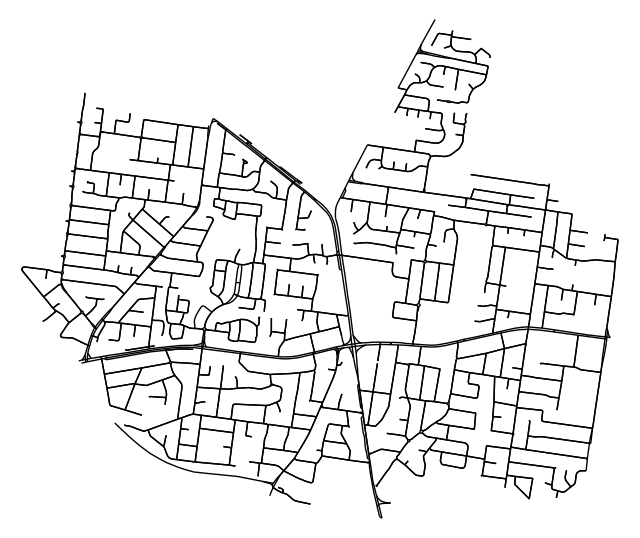

In [4]:
place_name = "Doncaster, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="black", edge_linewidth=1, bgcolor = 'white', filepath="/Users/Jackson/mothersDay2025/output/bw_donnie_drive.png", save=True, show=False)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif'

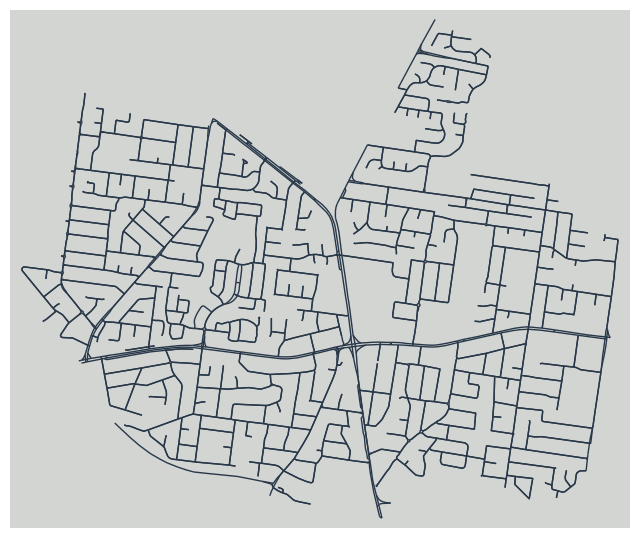

<Figure size 640x480 with 0 Axes>

In [10]:
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Calibri']

place_name = "Doncaster, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="#283849", edge_linewidth=1, bgcolor = '#D3D5D3')
#fig, ax = ox.plot_graph(graph, node_size=0, edge_color="#283849", edge_linewidth=1, bgcolor = '#D3D5D3', filepath="/Users/Jackson/mothersDay2025/output/reflection_navy_donnie_drive.png", save=True, show=False)

# text box
ax.text(0.5, 0.5, '$Doncaster, Victoria, Australia$', size=18, fontdict=None, bbox={})

# Save the plot as an SVG file
plt.savefig("/Users/Jackson/mothersDay2025/output/reflection_navy_text_donnie_drive.png", format='png')

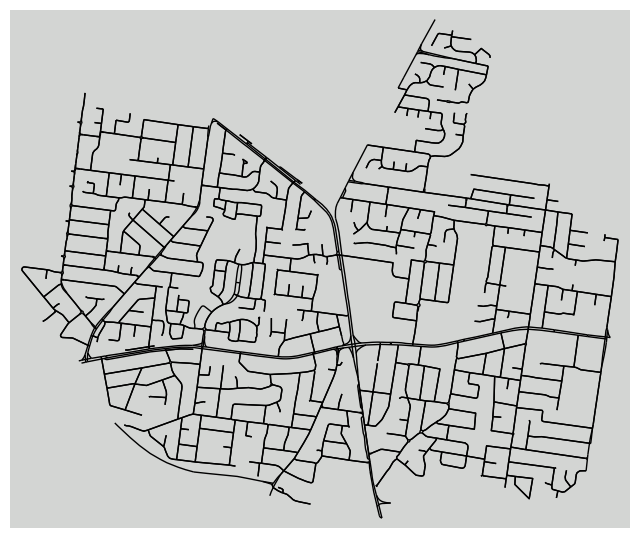

In [6]:
place_name = "Doncaster, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="black", edge_linewidth=1, bgcolor = '#D3D5D3', filepath="/Users/Jackson/mothersDay2025/output/reflection_black_donnie_drive.png", save=True, show=False)


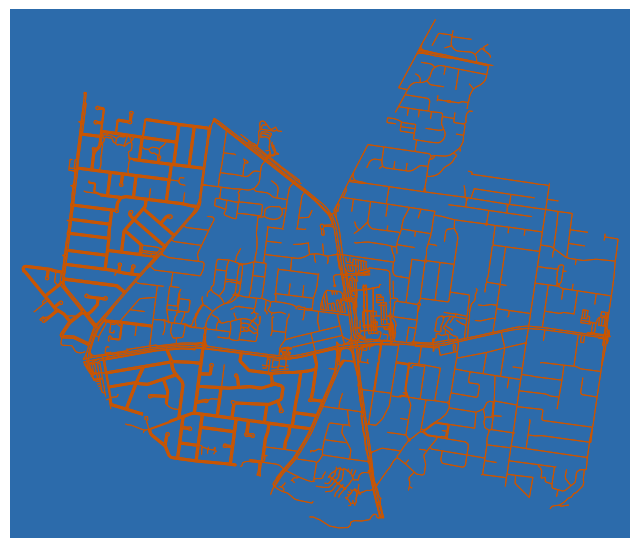

In [33]:
place_name = "Doncaster, Victoria, Australia"

graph = ox.graph_from_place(place_name, network_type="walk")

fig, ax = ox.plot_graph(graph, node_size=0, edge_color="#CC5500", edge_linewidth=0.75, bgcolor = '#2c6bab', filepath="/Users/Jackson/mothersDay2025/output/donnie_walk.png", save=True, show=False)

plt.savefig('/Users/Jackson/mothersDay2025/output/donnie_walk.png')
#plt.show()

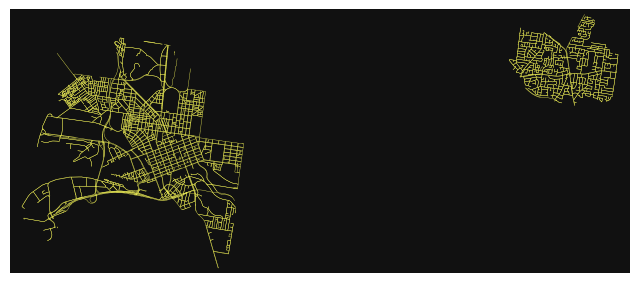

In [8]:
# create a network from multiple places
places = [
    "City of Melbourne, Victoria, Australia",
    "Doncaster, Victoria, Australia"
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
G = ox.graph.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot.plot_graph(G, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25)

In [17]:
# define the study sites as label : query
places_dict = {
    "Melbourne": "City of Melbourne, Victoria, Australia",
    "Doncaster": "Doncaster, Victoria, Australia"
}

In [6]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocoder.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((144.89698 -37.83464, 144.89703 -37.8...",144.896981,-37.850667,144.991346,-37.775451,18768950,relation,2404870,-37.812382,144.948261,boundary,administrative,12,0.44858,municipality,City of Melbourne,"City of Melbourne, Victoria, Australia"
1,"POLYGON ((145.09965 -37.78261, 145.09974 -37.7...",145.099653,-37.798797,145.145328,-37.767267,18436260,relation,2386805,-37.784830,145.123843,boundary,administrative,18,0.36454,suburb,Doncaster,"Doncaster, Melbourne, City of Manningham, Vict..."


In [ ]:
# create figure and axes
n = len(places_dict)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places_dict.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph.graph_from_place(place, network_type="drive")
    Gu = ox.bearing.add_edge_bearings(ox.convert.to_undirected(G))
    fig, ax = ox.plot.plot_orientation(Gu, ax=ax, title=place, area=True)

# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig("images/street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")
plt.close()

2025-04-29 10:10:03 Doncaster
2025-04-29 10:10:45 Melbourne
